# Handling Missing Values: Data Preprocessing

Based on your dataset (which appears to contain student placement records with some missing salary values), here are the essential techniques for handling missing values:

## 1. Basic Techniques for Missing Data

### a) Complete Case Analysis (Listwise Deletion)
```python
# Remove entire rows with any missing values
df_clean = df.dropna()
```
**When to use**: When missing data is random and <5% of your dataset  
**Pros**: Simple, maintains data integrity  
**Cons**: Loses information, reduces sample size

### b) Central Tendency Imputation
```python
# For numerical columns (mean/median)
df['salary'].fillna(df['salary'].median(), inplace=True)

# For categorical columns (mode)
df['status'].fillna(df['status'].mode()[0], inplace=True)
```
**When to use**: When data is missing completely at random  
**Pros**: Preserves sample size, simple to implement  
**Cons**: Can reduce variance, distort relationships

## 2. Advanced Techniques

### a) Predictive Modeling (Semi-Supervised Approach)
```python
from sklearn.ensemble import RandomForestRegressor

# Split into known and unknown salary data
known = df[df['salary'].notna()]
unknown = df[df['salary'].isna()]

# Train model
X = known.drop(['salary', 'sl_no'], axis=1)  # Features
y = known['salary']  # Target
model = RandomForestRegressor().fit(X, y)

# Predict missing values
predicted = model.predict(unknown.drop(['salary', 'sl_no'], axis=1))
df.loc[df['salary'].isna(), 'salary'] = predicted
```
**When to use**: When patterns exist in the data that can predict missing values  
**Pros**: Most accurate method when done properly  
**Cons**: Computationally expensive, risk of overfitting

### b) K-Nearest Neighbors (KNN) Imputation
```python
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=np.number)), 
                         columns=df.select_dtypes(include=np.number).columns)
```
**When to use**: When similar records likely have similar values  
**Pros**: More sophisticated than mean/median  
**Cons**: Computationally intensive for large datasets

## 3. Special Case Handling

### a) Domain-Specific Imputation
For your salary column (missing when status="Not Placed"):
```python
# Option 1: Set salary to 0 for "Not Placed"
df.loc[df['status'] == 'Not Placed', 'salary'] = 0

# Option 2: Create separate "Unemployed" category
df['salary'] = df['salary'].fillna('Unemployed')
```

### b) Multiple Imputation
```python
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10)
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=np.number)),
                         columns=df.select_dtypes(include=np.number).columns)
```

## Implementation Roadmap for Beginners

1. **First, understand your missing data**:
   ```python
   print(df.isnull().sum())
   print(df[df['salary'].isnull()].describe())
   ```

2. **For <5% missing values**:
   - Numerical: Median imputation (robust to outliers)
   - Categorical: Mode imputation or "Missing" category

3. **For >5% missing values**:
   - Try KNN imputation for numerical data
   - Consider predictive modeling if you have enough complete cases

4. **For columns with logical missingness** (like salary when not placed):
   - Use domain-specific imputation

## Key Considerations

1. **Always document** what method you used for each column
2. **Compare results** with/without imputation
3. **Never impute test data** using statistics from test data - always use training data parameters
4. **Visualize distributions** before/after imputation:
   ```python
   import seaborn as sns
   sns.boxplot(x=df['salary'])
   ```

Remember that missing data handling is highly context-dependent. The best method depends on:
- Why data is missing (random vs systematic)
- Percentage of missing values
- Importance of the feature
- Your ultimate analysis goals

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("Placement.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Here's a structured explanation based on your 4 scenarios, with clear text explanations first followed by implementation guidance:

### 1️⃣ Replace with Central Tendency (Mean/Median/Mode)
**When to use**: Best for small amounts of randomly missing data (<5% of column)  
**Why it works**: Preserves overall distribution while filling gaps  
**Implementation**:
```python
# For numerical columns (salary)
df['salary'].fillna(df['salary'].median(), inplace=True)  # Robust to outliers

# For categorical columns (degree_t)
df['degree_t'].fillna(df['degree_t'].mode()[0], inplace=True) 

# Check results
print(df['salary'].isnull().sum())
```

### 2️⃣ Entire Row Deletion
**When to use**: When missing data is minimal (<3% of total rows) AND completely random  
**Why it works**: Simplest approach that maintains pure data  
**Implementation**:
```python
# Delete rows where salary is missing
df_clean = df.dropna(subset=['salary'])

# Verify
print(f"Original: {len(df)} rows | Cleaned: {len(df_clean)} rows")
```
⚠️ **Warning**: Don't use if missingness relates to your target variable (e.g., all high earners refused to disclose)

### 3️⃣ Problem-Specific Replacement
**When to use**: When business logic dictates missing values  
**Why it works**: Matches real-world meaning of missingness  
**Implementation**:
```python
# For unplaced students (status=Not Placed), salary=0
df.loc[(df['status']=='Not Placed') & (df['salary'].isna()), 'salary'] = 0

# For test scores with missing values, assume minimum passing
df['etest_p'].fillna(50.0, inplace=True)  # Assuming 50 is passing
```

### 4️⃣ Predictive Modeling (Semi-Supervised)
**When to use**: When patterns in existing data can predict missing values  
**Why it works**: Most sophisticated method preserving relationships  
**Implementation**:
```python
from sklearn.ensemble import RandomForestRegressor

# Step 1: Prepare data
known = df[df['salary'].notna()]
unknown = df[df['salary'].isna()]

# Step 2: Convert categoricals to numeric
cat_cols = ['gender','hsc_s','degree_t']
known_encoded = pd.get_dummies(known, columns=cat_cols)
unknown_encoded = pd.get_dummies(unknown, columns=cat_cols)

# Step 3: Train and predict
X = known_encoded.drop(['sl_no','salary','status'], axis=1)
y = known_encoded['salary']
model = RandomForestRegressor().fit(X,y)

# Step 4: Fill predictions
preds = model.predict(unknown_encoded.drop(['sl_no','salary','status'], axis=1))
df.loc[df['salary'].isna(), 'salary'] = preds
```

### 📊 Decision Flowchart for Beginners
1. **Check missingness pattern**: `df.isnull().mean()*100`
2. **<5% missing?** → Use Method 1 (Central Tendency)
3. **Logical reason for missing?** → Use Method 3 (Domain-specific)
4. **Large dataset with patterns?** → Use Method 4 (Modeling)
5. **Tiny dataset with random missing?** → Use Method 2 (Deletion)

### Pro Tip:
Always visualize before/after:
```python
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['salary'].plot(kind='hist', title='Before Imputation')
plt.subplot(1,2,2)
df_imputed['salary'].plot(kind='hist', title='After Imputation')
plt.show()
```

In [5]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [7]:
#Delete the entrire row have null values
dataset.dropna(inplace=True)

In [8]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


### Implementation for handling missing values based on data types, using **mode for categorical** columns and **median/mean for numerical** columns:
---

### **Key Concepts Explained**

#### **1. Categorical Data (Mode)**
- **Why Mode?**  
  Categorical values have no mathematical relationship, so the most frequent value (mode) preserves the original distribution.

- **Implementation**:  
  ```python
  df['department'].fillna(df['department'].mode()[0], inplace=True)
  ```

#### **2. Numerical Data (Median/Mean)**
| Method  | When to Use | Code Example |
|---------|-------------|--------------|
| **Median** | Data has outliers | `df['salary'].fillna(df['salary'].median(), inplace=True)` |
| **Mean**  | Normally distributed data | `df['rating'].fillna(df['rating'].mean(), inplace=True)` |

---

### **Best Practices**
1. **Check Data Types First**  
   ```python
   print(df.dtypes)
   ```

2. **Visualize Missing Values**  
   ```python
   import seaborn as sns
   sns.heatmap(df.isnull(), cbar=False)
   ```

3. **Validate Results**  
   ```python
   print("Remaining missing values:", df.isnull().sum().sum())
   ```

4. **Save Cleaned Data**  
   ```python
   df.to_csv('cleaned_data.csv', index=False)
   ```

---

### **Special Cases**
- **Binary Categories**: For columns like `employed` (Yes/No), use mode.  
- **High-Cardinality Categories**: Consider "Unknown" as a new category instead of mode.  
- **Skewed Numerical Data**: Always prefer median over mean for skewed distributions (e.g., income data).

In [9]:
import pandas as pd
dataset = pd.read_csv("Placement.csv")

In [10]:
dataset["salary"].fillna(dataset["salary"].mean(),inplace=True)

In [11]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


In [12]:
dataset["salary"].fillna(dataset["salary"].median(),inplace=True)

In [13]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


In [14]:
dataset.to_csv('cleaned_dataset.csv', index=False)

### Univariate feature imputation
The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.

In [15]:
def quanQual(dataset):
    quan=[]
    qual=[]
    for columnName in dataset.columns:
        #print(columnName)
        if(dataset[columnName].dtype=='O'):
            #print("qual")
            qual.append(columnName)
        else:
            #print("quan")
            quan.append(columnName)
    return quan,qual

In [16]:
quan,qual = quanQual(dataset)

In [17]:
dataset[quan]

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1,67.00,91.00,58.00,55.0,58.80,270000.000000
1,2,79.33,78.33,77.48,86.5,66.28,200000.000000
2,3,65.00,68.00,64.00,75.0,57.80,250000.000000
3,4,56.00,52.00,52.00,66.0,59.43,288655.405405
4,5,85.80,73.60,73.30,96.8,55.50,425000.000000
...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.000000
211,212,58.00,60.00,72.00,74.0,53.62,275000.000000
212,213,67.00,67.00,73.00,59.0,69.72,295000.000000
213,214,74.00,66.00,58.00,70.0,60.23,204000.000000


In [20]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
# Assuming 'quan' is your list of quantitative columns
quan = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
# 1. Initialize Imputer (using mean strategy)
imp = SimpleImputer(missing_values=np.nan, strategy='median')
# 2. Fit and transform the data
imputed_dataset = imp.fit_transform(dataset[quan])
# 3. Convert back to DataFrame with original column names
imputed_dataset = pd.DataFrame(imputed_dataset, columns=quan)
# 4. Merge with non-numerical columns (if needed)
final_dataset = dataset.copy()
final_dataset[quan] = imputed_dataset
# Display the first 5 rows
display(final_dataset.head())

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


In [21]:
imp

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [22]:
imputed_dataset= pd.DataFrame(dataset, columns = quan)

In [23]:
imputed_dataset

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.000000
1,79.33,78.33,77.48,86.5,66.28,200000.000000
2,65.00,68.00,64.00,75.0,57.80,250000.000000
3,56.00,52.00,52.00,66.0,59.43,288655.405405
4,85.80,73.60,73.30,96.8,55.50,425000.000000
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.000000
211,58.00,60.00,72.00,74.0,53.62,275000.000000
212,67.00,67.00,73.00,59.0,69.72,295000.000000
213,74.00,66.00,58.00,70.0,60.23,204000.000000


In [24]:
nume = imputed_dataset

In [ ]:
cate = dataset[qual]

In [27]:
cate

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
210,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [28]:
two=[nume,cate]

In [30]:
preprocessed=pd.concat(two,axis=1)

In [31]:
preprocessed

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [32]:
preprocessed.isnull().sum()

ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

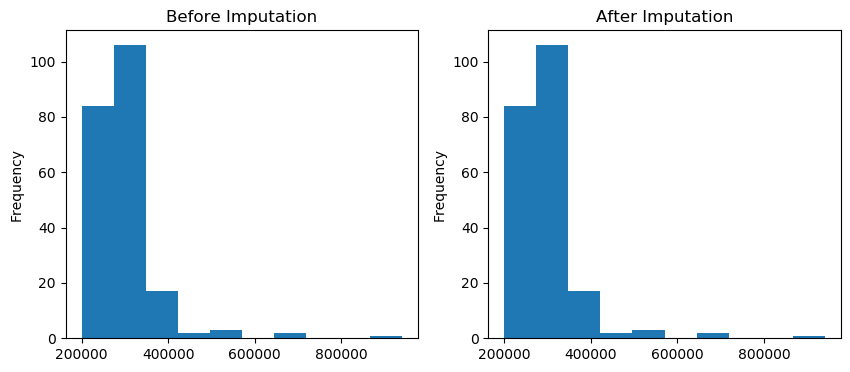

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
preprocessed['salary'].plot(kind='hist', title='Before Imputation')
plt.subplot(1,2,2)
preprocessed['salary'].plot(kind='hist', title='After Imputation')
plt.show()

In [33]:
preprocessed.to_csv("Preplacementdata.csv",index=False)

### Download your cleaned dataset as a CSV file after imputing missing values:

### **Complete Download Solution**

```python
# After performing all data cleaning steps (including the SimpleImputer transformation shown earlier)

# 1. Save to CSV
final_dataset.to_csv('cleaned_student_placement.csv', index=False)

# 2. Verify the file was created
import os
print(f"File saved at: {os.getcwd()}/cleaned_student_placement.csv")
print(f"File size: {os.path.getsize('cleaned_student_placement.csv')} bytes")

# 3. For Jupyter/Colab users - create download link
from IPython.display import FileLink
FileLink('cleaned_student_placement.csv')  # Clickable link appears below cell
```

### **Key Options for CSV Export**:

| Parameter       | Recommendation          | Purpose                          |
|-----------------|-------------------------|----------------------------------|
| `index=False`   | Always use              | Prevents extra index column      |
| `encoding=`     | `'utf-8'` (default)     | For international characters     |
| `float_format='%.2f'` | Optional       | Controls decimal precision       |

### **Alternative Download Methods**:

**A. For Google Colab:**
```python
from google.colab import files
files.download('cleaned_student_placement.csv')  # Forces browser download
```

**B. For Advanced Formatting:**
```python
# With custom formatting for numeric columns
final_dataset.to_csv(
    'formatted_placement_data.csv',
    index=False,
    float_format='%.1f',  # 1 decimal place for floats
    columns=['sl_no', 'gender', 'salary']  # Select specific columns
)
```

**C. For Large Datasets (Compressed):**
```python
final_dataset.to_csv(
    'cleaned_data.zip',
    index=False,
    compression={'method': 'zip', 'archive_name': 'placement.csv'}
)
```

### **Verification Steps**:
1. Check the first 5 lines from terminal:
   ```bash
   head cleaned_student_placement.csv
   ```
2. Read back into Python to validate:
   ```python
   test_read = pd.read_csv('cleaned_student_placement.csv')
   print(test_read.head())
   ```

### Data Preprocessing with mixed types example

In [34]:
import pandas as pd
import numpy as np

# Sample dataset with mixed types
data = {
    'age': [25, 30, np.nan, 35, 40],          # Numerical
    'salary': [50000, np.nan, 70000, np.nan, 90000],  # Numerical  
    'department': ['HR', 'IT', 'IT', np.nan, 'Finance'],  # Categorical
    'rating': [4.5, np.nan, 3.8, 4.0, np.nan]  # Numerical
}
dataset = pd.DataFrame(data)  # Renamed from df to dataset

# 1. Categorical Imputation (Mode)
categorical_cols = dataset.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_val = dataset[col].mode()[0]  # Most frequent category
    dataset[col].fillna(mode_val, inplace=True)
    print(f"Filled {col} missing values with: '{mode_val}'")

# 2. Numerical Imputation (Median)
numerical_cols = dataset.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    median_val = dataset[col].median()
    dataset[col].fillna(median_val, inplace=True)
    print(f"Filled {col} missing values with median: {median_val}")

# 3. Verification
print("\nCleaned Dataset Summary:")
print(dataset.info())
print("\nMissing values after imputation:")
print(dataset.isnull().sum())

Filled department missing values with: 'IT'
Filled age missing values with median: 32.5
Filled salary missing values with median: 70000.0
Filled rating missing values with median: 4.0

Cleaned Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
age           5 non-null float64
salary        5 non-null float64
department    5 non-null object
rating        5 non-null float64
dtypes: float64(3), object(1)
memory usage: 288.0+ bytes
None

Missing values after imputation:
age           0
salary        0
department    0
rating        0
dtype: int64


In [35]:
final_dataset.to_csv('cleaned_student_placement.csv', index=False)

# 2. Verify the file was created
import os
print(f"File saved at: {os.getcwd()}/cleaned_student_placement.csv")
print(f"File size: {os.path.getsize('cleaned_student_placement.csv')} bytes")

# 3. For Jupyter/Colab users - create download link
from IPython.display import FileLink
FileLink('cleaned_student_placement.csv')  # Clickable link appears below cell

File saved at: D:\aiml\1.HOPE AI\1.HOPE AI STUDY\5.Data Science-Univate\Univariate Analysis/cleaned_student_placement.csv
File size: 20888 bytes


D:\aiml\1.HOPE AI\1.HOPE AI STUDY\5.Data Science-Univate\Univariate Analysis\cleaned_student_placement.csv

In [36]:
# 2. Save the DataFrame to Excel
final_dataset.to_excel('cleaned_placement_data.xlsx', 
                      index=False,  # Don't save row numbers
                      sheet_name='Placement Data',  # Custom sheet name
                      engine='openpyxl')  # Required engine for .xlsx

# 3. Verify the file was created
import os
print(f"File saved at: {os.path.abspath('cleaned_placement_data.xlsx')}")

# 4. For Jupyter/Colab: Create download link
from IPython.display import FileLink
FileLink('cleaned_placement_data.xlsx')  # Clickable download button

File saved at: D:\aiml\1.HOPE AI\1.HOPE AI STUDY\5.Data Science-Univate\Univariate Analysis\cleaned_placement_data.xlsx


D:\aiml\1.HOPE AI\1.HOPE AI STUDY\5.Data Science-Univate\Univariate Analysis\cleaned_placement_data.xlsx